<a href="https://colab.research.google.com/github/19pa1a0586/AI/blob/master/ml_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn.datasets import load_boston
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

**STEP:1**
    
    Data Preprocessing

In [0]:
#load the dataset
boston=load_boston()
#Description of the dataset
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [0]:
#Keep the imported data into pandas data frames
features=pd.DataFrame(boston.data,columns=boston.feature_names)
features

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [0]:
#check whether the dataset consists of any null(or)missing values
features.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

In [0]:
#To display any one column from the dataset
# dataframe["column_name"]
features["RM"]

0      6.575
1      6.421
2      7.185
3      6.998
4      7.147
       ...  
501    6.593
502    6.120
503    6.976
504    6.794
505    6.030
Name: RM, Length: 506, dtype: float64

In [0]:
#We need to store the target into other dataframe called "target"
target=pd.DataFrame(boston.target,columns=["target"])
target

,target
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


In [0]:
#To find the minimum and maximum prices of the houses in this data

# max(dataframe_object["column_name"])
print("max =",max(target["target"]))

# min(dataframe_object["column_name"])
print("min =",min(target["target"]))

max = 50.0
min = 5.0


In [0]:
# Concatenate features and targets into a single data frame
# axis=1 makes it concatenate in column wise and by default the axis=0 which means row wise
# pd.concat(objects,axis)
df=pd.concat([features,target],axis=1)
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [0]:
# use round(decimals=2) to set the precision to 2 decimal places
# describe() gives the Statistical values of each column
df.describe().round(decimals=2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
count,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00
mean,3.61,11.36,11.14,0.07,0.55,6.28,68.57,3.80,9.55,408.24,18.46,356.67,12.65,22.53
std,8.60,23.32,6.86,0.25,0.12,0.70,28.15,2.11,8.71,168.54,2.16,91.29,7.14,9.20
min,0.01,0.00,0.46,0.00,0.38,3.56,2.90,1.13,1.00,187.00,12.60,0.32,1.73,5.00
25%,0.08,0.00,5.19,0.00,0.45,5.89,45.02,2.10,4.00,279.00,17.40,375.38,6.95,17.02
50%,0.26,0.00,9.69,0.00,0.54,6.21,77.50,3.21,5.00,330.00,19.05,391.44,11.36,21.20
75%,3.68,12.50,18.10,0.00,0.62,6.62,94.07,5.19,24.00,666.00,20.20,396.22,16.96,25.00
max,88.98,100.00,27.74,1.00,0.87,8.78,100.00,12.13,24.00,711.00,22.00,396.90,37.97,50.00


In [0]:
# calculate the correlation between each and every column of the data
# dataframe.corr("Method")
corr=df.corr("pearson")

In [0]:
# Take absolute values of correlations
corrs=[abs(corr[attr]["target"]) for attr in list(features)]

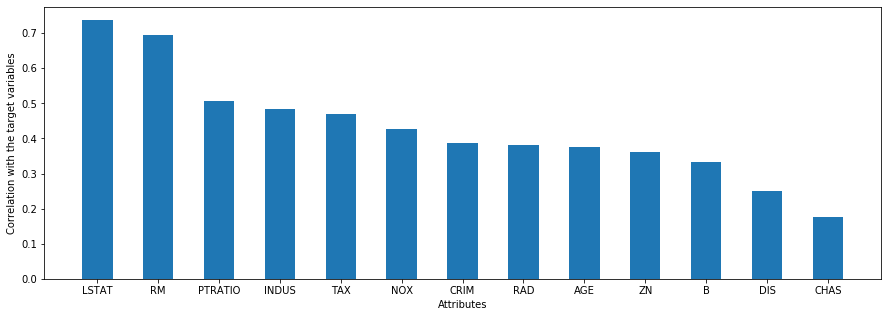

In [0]:
# Make a list of pairs[(corr,features)]
# zip(*iterators)
l=list(zip(corrs,list(features)))

# Sort the list of pairs in the reverse/decending order with the correlation value as the key of sorting
l.sort(key=lambda x : x[0],reverse=True)

# "unzip" pairs to two lists
# zip(*l)= takes a list that looks like [[p,o,p],[g,o,t],[h,o,t]]
# and returns [[p,g,h],[o,o,o],[p,t,h]]
corrs, labels=list(zip(*l))

# plot correlations of the target variables as bar graph
# plt.bar(x,height,width=0.8)
index=np.arange(len(labels))
plt.figure(figsize=(15,5))
plt.bar(index,corrs,width=0.5)
plt.xlabel("Attributes")
plt.ylabel("Correlation with the target variables")
plt.xticks(index,labels)
plt.show()

**we can observe from the above bar graph , that LSTAT and RM are the two highest obsolute correlation values**

**Normalize the data**

Normalize the data with MinMaxScaler

In [0]:
x=df["LSTAT"].values
y=df["target"].values
y

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [0]:
#Before Normalization
print(y[:5])

[24.  21.6 34.7 33.4 36.2]


In [0]:
# MinMaxScaler() is used to store the values from 0 to 1
x_scaler=MinMaxScaler()
x=x_scaler.fit_transform(x.reshape(-1,1))
x=x[:,-1]
y_scaler=MinMaxScaler()
y=y_scaler.fit_transform(y.reshape(-1,1))
y=y[:,-1]
y

array([0.42222222, 0.36888889, 0.66      , 0.63111111, 0.69333333,
       0.52666667, 0.39777778, 0.49111111, 0.25555556, 0.30888889,
       0.22222222, 0.30888889, 0.37111111, 0.34222222, 0.29333333,
       0.33111111, 0.40222222, 0.27777778, 0.33777778, 0.29333333,
       0.19111111, 0.32444444, 0.22666667, 0.21111111, 0.23555556,
       0.19777778, 0.25777778, 0.21777778, 0.29777778, 0.35555556,
       0.17111111, 0.21111111, 0.18222222, 0.18      , 0.18888889,
       0.30888889, 0.33333333, 0.35555556, 0.43777778, 0.57333333,
       0.66444444, 0.48      , 0.45111111, 0.43777778, 0.36      ,
       0.31777778, 0.33333333, 0.25777778, 0.20888889, 0.32      ,
       0.32666667, 0.34444444, 0.44444444, 0.40888889, 0.30888889,
       0.67555556, 0.43777778, 0.59111111, 0.40666667, 0.32444444,
       0.30444444, 0.24444444, 0.38222222, 0.44444444, 0.62222222,
       0.41111111, 0.32      , 0.37777778, 0.27555556, 0.35333333,
       0.42666667, 0.37111111, 0.39555556, 0.40888889, 0.42444

In [0]:
#After Normalization
print(y[:5])

[0.42222222 0.36888889 0.66       0.63111111 0.69333333]


**STEP-2**
       

**Define Error**

In [0]:
# Generate n evenly spaced values from zero radians to 2 pi radians
n=200
x=np.linspace(0,2**np.pi,n)
sine_values=np.sin(x)

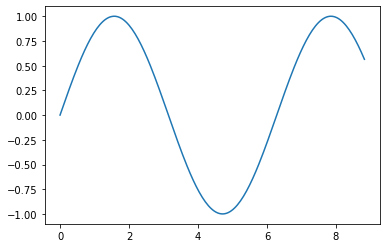

In [0]:
# Plot the sine wave
plt.plot(x,sine_values)

In [0]:
# Add some noise to the sine wave
noise=0.5
noisy_sine_values=sine_values+np.random.uniform(-noise,noise,n)

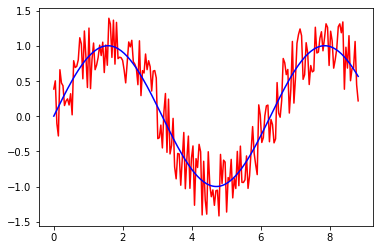

In [0]:
# plot the noisy values
plt.plot(x,noisy_sine_values,color="r")
plt.plot(x,sine_values,color="b")

In [0]:
# Calculate Mean Squared Error using the equation
error_value=(1/n)*sum(np.power(sine_values-noisy_sine_values,2))
error_value

0.08560203555328705

In [0]:
# Calculate Mean Squared Error using the function from the SKlearn Library
mean_squared_error(sine_values,noisy_sine_values)

0.08560203555328705

**We can observe that the MSE values are not very different from each other**

**STEP 3**




**Split the data**

In [0]:
# 0.2 indicates 20% of the data is randomly samples a tested data.
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

**STEP 4**

**Bulid the model**

In [0]:
# 1) Error function
# To calculate the cost function at the current position
def error(m,x,c,t):
    N=x.size
    e=sum(((m*x+c)-t)**2)
    return e * 1/(2*N)

In [0]:
# 2) Update function
# To calculate the m & c.
def update(m,x,c,t,learning_rate):
    grad_m=sum(2*((m*x+c)-t)*x)
    grad_c=sum(2*((m*x+c)-t))
    m=m-grad_m*learning_rate
    c=c-grad_c*learning_rate
    return m,c

In [0]:
# 3) Gradient Descent function
# If the error falls below the threshold, then the gradient decent process is stopped and the weights are returned
def gradient_decent(init_m,init_c,x,t,learning_rate,iterations,error_threshold):
    m=init_m
    c=init_c
    error_values=list()
    mc_values=list()
    for i in range(iterations):
        e=error(m,x,c,t)
        if e<error_threshold:
            print("Error less that the threshold.so,we are stopping the gradient descent")
            break
        error_values.append(e)
        m,c=update(m,x,c,t,learning_rate)
        mc_values.append((m,c))
    return m,c,error_values,mc_values

In [0]:
init_m=0
init_c=0
learning_rate=0.001
iterations=1000
error_threshold=0.001

In [0]:
m,c,error_values,mc_values = gradient_decent(init_m,init_c,x_train,y_train,learning_rate,iterations,error_threshold)

**Visualization of the Error values**

1) Plot the regression line : This line is aganist the training data set to visualize what the line looks like for the         training data set

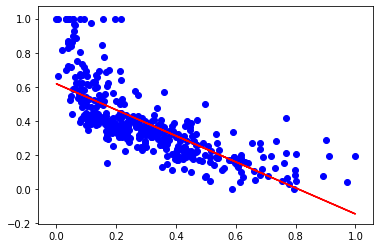

In [0]:
# plotting the regression line upon the training data set:
plt.scatter(x_train,y_train,color='b')
plt.plot(x_train,(m*x_train+c),color='r')

2) Plot the error values : This graph will show you how the error drops over time

Text(0, 0.5, 'Error')

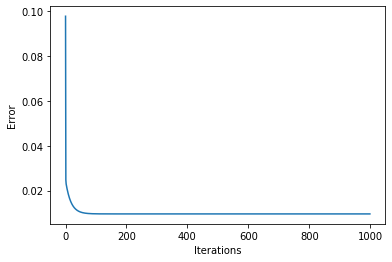

In [0]:
# plotting the error values
plt.plot(np.arange(len(error_values)),error_values)
plt.xlabel("Iterations")
plt.ylabel("Error")

**STEP 5**

**Prediction of prices**

We obtained the final values of m & c in step 4.using these values we obtain predictions for the values in the testing data

Then we will evaluate the model with certain metrics such as RMSE,R2 score etc..The choice of the metrics will depend on the type of the data.That is categorical (or) continuous etc..

In [0]:
# Calculate the predictions on the test set as a  vectorized operation.
y_predict=(m*x_test)+c

In [0]:
# Compute MSE for the predicted values on the testing set.
mean_squared_error(y_test,y_predict)

0.018401797612915854

In [0]:
p=pd.DataFrame(list(zip(x_test,y_test,y_predict)),columns=["x","target_y","predicted_y"])

In [0]:
p.head()

,x,target_y,predicted_y
0,0.449779,0.213333,0.276415
1,0.031457,0.697778,0.596482
2,0.034216,1.000000,0.594370
3,0.583609,0.173333,0.174019
4,0.098234,0.375556,0.545389


Plot the predicted values aganist the target values :

1 . Predicted values are represented by red colored line

2 . Target values are represented by blue colored line

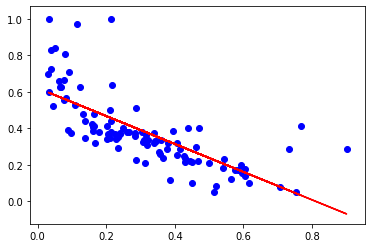

In [0]:
plt.scatter(x_test,y_test,color="b") 
plt.plot(x_test,y_predict,color="r")

**Revert the normalization to obtain the predicted price of the houses in $1000s**

The predicted values are in the range of 0 to 1.but,this is not useful to us when we want to predict the prices

so,Use inverse_transform() to scale the values back to original representation

In [0]:
# Reshape to change the shape that is required by the scaler
x_test=x_test.reshape(-1,1)
y_test=y_test.reshape(-1,1)
y_predict=y_predict.reshape(-1,1)

x_test_scaled=x_scaler.inverse_transform(x_test)
y_test_scaled=y_scaler.inverse_transform(y_test)
y_predict_scaled=y_scaler.inverse_transform(y_predict)

# This is to remove the extra dimension
x_test_scaled=x_test_scaled[:,-1]
y_test_scaled=y_test_scaled[:,-1]
y_predict_scaled=y_predict_scaled[:,-1]

p=pd.DataFrame(list(zip(x_test_scaled,y_test_scaled,y_predict_scaled)),columns=["x","target_y","predicted_y"])
p=p.round(decimals=2)
p.head()

,x,target_y,predicted_y
0,18.03,14.6,17.44
1,2.87,36.4,31.84
2,2.97,50.0,31.75
3,22.88,12.8,12.83
4,5.29,21.9,29.54
